In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
# from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *

In [2]:
df=pd.read_csv("data/2011.csv")
df.head()

Unnamed: 0  origIntRate  origUPB  origLTV  origDebtIncRatio  \
0       77166        4.750   112000       80                36   
1       77167        4.600   101000       60                32   
2       77168        5.375   123000       70                30   
3       77169        4.375   185000       79                31   
4       77170        4.375   176000       78                30   

   worstCreditScore  zeroBalCode    mSA  
0               697            0  28100  
1               704            0  20740  
2               681            0  16980  
3               804            0  37980  
4               712            0  48620

In [3]:
df.drop('Unnamed: 0', 1, inplace = True)

In [4]:
df.shape

(14111, 7)

In [5]:
df.head()

origIntRate  origUPB  origLTV  origDebtIncRatio  worstCreditScore  \
0        4.750   112000       80                36               697   
1        4.600   101000       60                32               704   
2        5.375   123000       70                30               681   
3        4.375   185000       79                31               804   
4        4.375   176000       78                30               712   

   zeroBalCode    mSA  
0            0  28100  
1            0  20740  
2            0  16980  
3            0  37980  
4            0  48620

# Pycaret - Setup with categorical definition

### Use complex setup 

In [6]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , normalize = True
    , numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
        ]
     , categorical_features = [
            'mSA'
        ]   
)


 
Setup Succesfully Completed!


## Compare Models with no blacklist exclusions

In [7]:
model_results=compare_models(fold = 5, turbo = True)
model_results

## Create models 

#### Extra Trees

In [8]:
lr = create_model('lr', fold=10)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9281  0.8433  0.0685  0.6250  0.1235  0.1105
1       0.9261  0.8343  0.0405  0.6000  0.0759  0.0671
2       0.9231  0.8037  0.0135  0.2500  0.0256  0.0181
3       0.9271  0.8398  0.0405  0.7500  0.0769  0.0698
4       0.9271  0.8351  0.0405  0.7500  0.0769  0.0698
5       0.9251  0.8190  0.0000  0.0000  0.0000  0.0000
6       0.9241  0.8475  0.0000  0.0000  0.0000 -0.0020
7       0.9240  0.8222  0.0137  0.2500  0.0260  0.0184
8       0.9271  0.8170  0.0274  0.6667  0.0526  0.0471
9       0.9281  0.8237  0.0274  1.0000  0.0533  0.0496
Mean    0.9260  0.8286  0.0272  0.4892  0.0511  0.0448
SD      0.0017  0.0130  0.0202  0.3244  0.0370  0.0342

## Evaluate Models

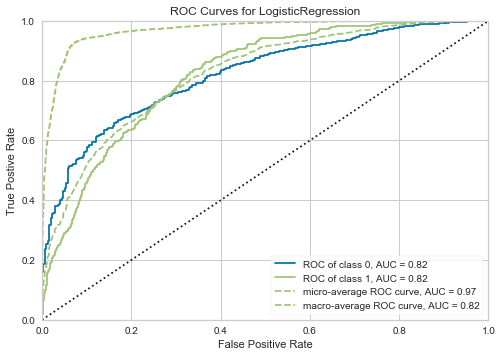

In [9]:
plot_model(lr)

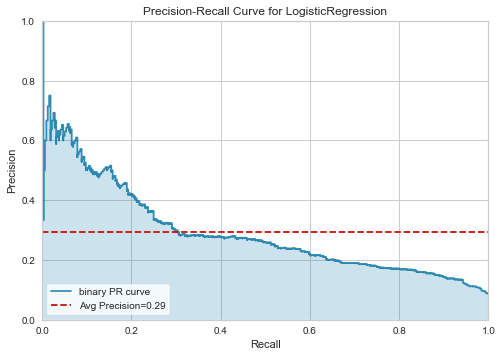

In [10]:
plot_model(lr, plot = 'pr')

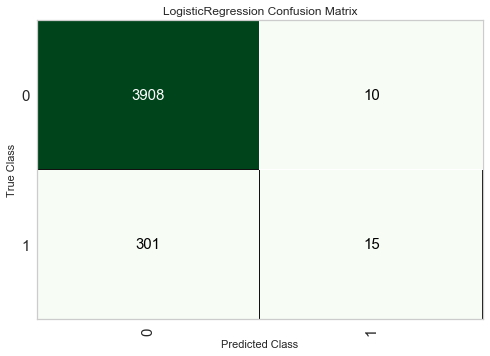

In [11]:
plot_model(lr, plot='confusion_matrix')

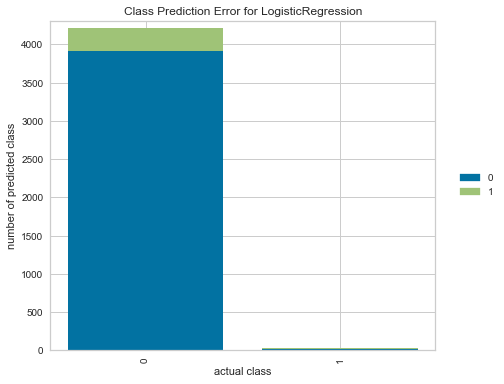

In [12]:
plot_model(lr, plot = 'error')

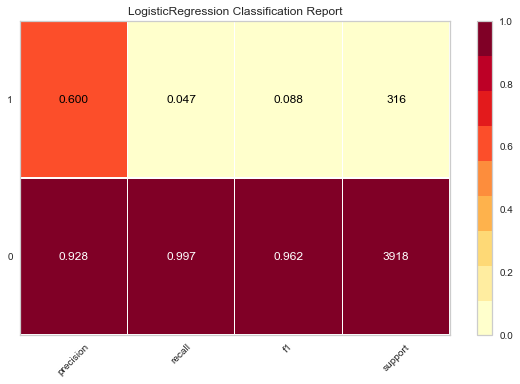

In [13]:
plot_model(lr, plot = 'class_report')

## Finalize the Model

In [17]:
final_lr = finalize_model(lr)

# Predict models

In [18]:
df2 = pd.read_csv('data/2012.csv')
df2.head()

Unnamed: 0  origIntRate  origUPB  origLTV  origDebtIncRatio  \
0       92142        4.125   591000       60                45   
1       92143        5.250    46000       80                25   
2       92146        4.375   439000       70                37   
3       92147        4.250   101000       75                41   
4       92148        4.375   256000       80                37   

   worstCreditScore  zeroBalCode    mSA  
0               673            0  31080  
1               691            0  44180  
2               789            0  42660  
3               686            0      0  
4               723            0  35380

In [19]:
predictions = predict_model(final_lr, data = df2)
predictions

Unnamed: 0  origIntRate  origUPB  origLTV  origDebtIncRatio  \
0           92142        4.125   591000       60                45   
1           92143        5.250    46000       80                25   
2           92146        4.375   439000       70                37   
3           92147        4.250   101000       75                41   
4           92148        4.375   256000       80                37   
...           ...          ...      ...      ...               ...   
18500      111331        3.375   232000       73                33   
18501      111332        4.125   127000       67                34   
18502      111333        3.875   102000       37                39   
18503      111334        3.875   180000       75                39   
18504      111335        4.125   248000       80                44   

       worstCreditScore  zeroBalCode    mSA  Label   Score  
0                   673            0  31080      0  0.0008  
1                   691            0  44180      0  0.1842  
2                   789            0  42660      0  0.0052  
3                   686            0      0      0  0.0896  
4                   723            0  35380      0  0.0372  
...                 ...          ...    ...    ...     ...  
18500               755            0  11460      0  0.0165  
18501               653            0  40140      0  0.0340  
18502               670            0  39580      0  0.0069  
18503               661            0  14460      0  0.0372  
18504               730            0  41700      0  0.0429  

[18505 rows x 10 columns]

In [20]:
predictions.to_csv('data/predict_results.csv')

In [21]:
save_model(lr, 'lr200527')

Transformation Pipeline and Model Succesfully Saved
